***Question 1***

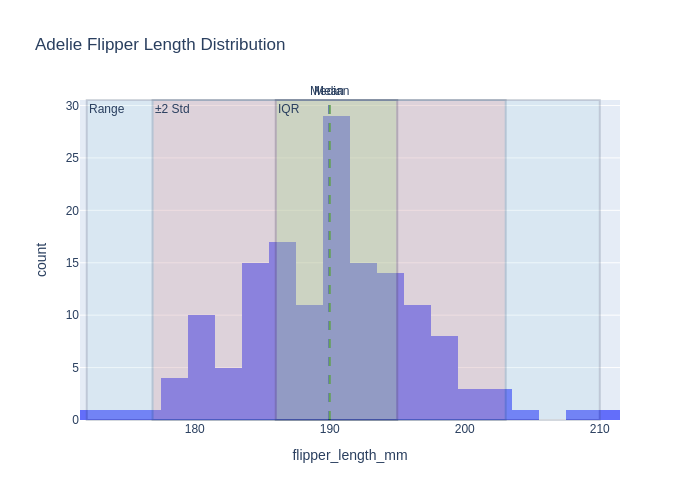

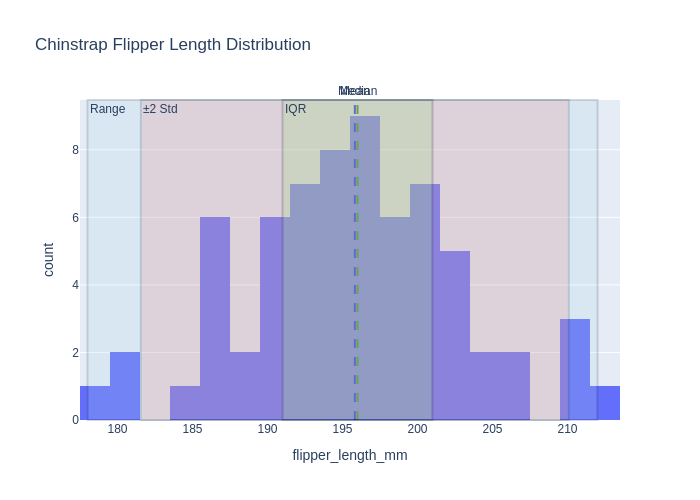

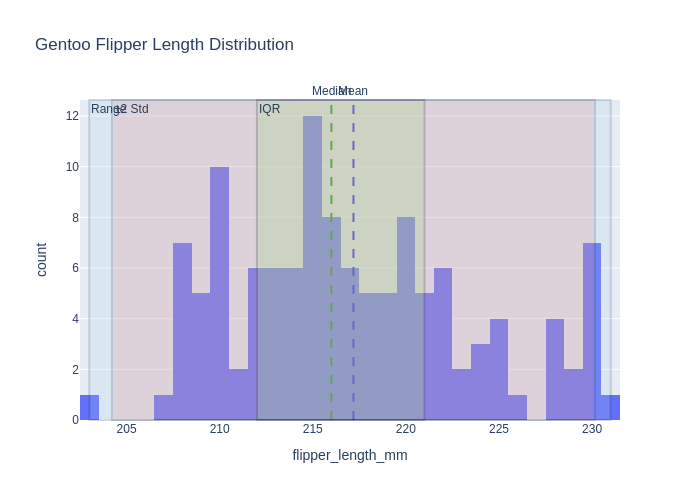

In [81]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd

# Load the Penguins dataset from seaborn
df = sns.load_dataset('penguins')

# Create a function to calculate statistics
def calculate_stats(df, species):
    species_df = df[df['species'] == species]
    flipper_length = species_df['flipper_length_mm'].dropna()
    
    mean_val = flipper_length.mean()
    median_val = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    std_val = flipper_length.std()
    iqr_val = flipper_length.quantile(0.75) - flipper_length.quantile(0.25)
    iqr_lower = flipper_length.quantile(0.25)
    iqr_upper = flipper_length.quantile(0.75)
    
    return {
        'mean': mean_val,
        'median': median_val,
        'min': min_val,
        'max': max_val,
        'std': std_val,
        'iqr_lower': iqr_lower,
        'iqr_upper': iqr_upper,
        '2_std_lower': mean_val - 2 * std_val,
        '2_std_upper': mean_val + 2 * std_val,
    }

# Create a Plotly histogram
def create_histogram_with_stats(df, species):
    stats = calculate_stats(df, species)
    fig = px.histogram(df[df['species'] == species], x="flipper_length_mm", 
                       nbins=30, title=f"{species} Flipper Length Distribution")
    
    # Add mean and median lines
    fig.add_vline(x=stats['mean'], line=dict(color='blue', dash='dash'), annotation_text="Mean", annotation_position="top")
    fig.add_vline(x=stats['median'], line=dict(color='green', dash='dash'), annotation_text="Median", annotation_position="top")

    # Add rectangles for range, IQR, and 2 std
    fig.add_vrect(x0=stats['min'], x1=stats['max'], 
                  fillcolor="lightblue", opacity=0.2, 
                  annotation_text="Range", annotation_position="top left")
    
    fig.add_vrect(x0=stats['iqr_lower'], x1=stats['iqr_upper'], 
                  fillcolor="lightgreen", opacity=0.3, 
                  annotation_text="IQR", annotation_position="top left")
    
    fig.add_vrect(x0=stats['2_std_lower'], x1=stats['2_std_upper'], 
                  fillcolor="lightcoral", opacity=0.2, 
                  annotation_text="±2 Std", annotation_position="top left")

    return fig

# Plot histograms for each species
for species in df['species'].unique():
    fig = create_histogram_with_stats(df, species)
    fig.show(renderer="png")

***Question 2***

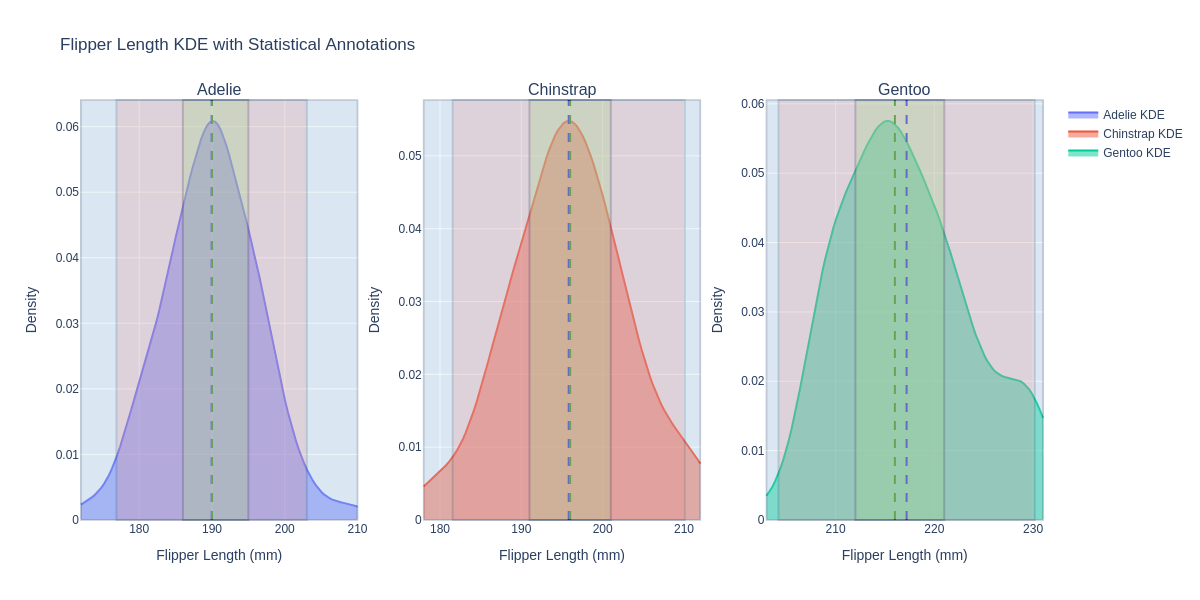

In [82]:
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde
import numpy as np

# Load the penguins dataset from seaborn
df = sns.load_dataset('penguins').dropna(subset=['flipper_length_mm'])

# Function to calculate statistics
def calculate_stats(df, species):
    species_df = df[df['species'] == species]
    flipper_length = species_df['flipper_length_mm'].dropna()
    
    mean_val = flipper_length.mean()
    median_val = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    std_val = flipper_length.std()
    iqr_lower = flipper_length.quantile(0.25)
    iqr_upper = flipper_length.quantile(0.75)
    
    return {
        'mean': mean_val,
        'median': median_val,
        'min': min_val,
        'max': max_val,
        'iqr_lower': iqr_lower,
        'iqr_upper': iqr_upper,
        '2_std_lower': mean_val - 2 * std_val,
        '2_std_upper': mean_val + 2 * std_val,
    }

# Function to create KDE data using gaussian_kde from scipy
def get_kde_data(flipper_length):
    kde = gaussian_kde(flipper_length)
    
    # Define x-axis values for KDE estimation
    x_values = np.linspace(flipper_length.min(), flipper_length.max(), 100)
    
    # Get the density for each x_value
    y_values = kde(x_values)
    
    return x_values, y_values

# Create a Plotly figure with subplots (3 species in a row)
fig = make_subplots(rows=1, cols=3, subplot_titles=df['species'].unique())

# Iterate over each species to create a KDE plot and add location/scale metrics
for i, species in enumerate(df['species'].unique()):
    # Filter data for the species
    species_df = df[df['species'] == species]
    flipper_length = species_df['flipper_length_mm'].dropna()

    # Calculate statistics
    stats = calculate_stats(df, species)
    
    # Get KDE data
    kde_x, kde_y = get_kde_data(flipper_length)
    
    # Add KDE plot as a line plot
    fig.add_trace(go.Scatter(x=kde_x, y=kde_y, fill='tozeroy', name=f'{species} KDE', mode='lines'), row=1, col=i+1)
    
    # Add vertical lines for mean and median
    fig.add_vline(x=stats['mean'], line=dict(color='blue', dash='dash'), row=1, col=i+1)
    fig.add_vline(x=stats['median'], line=dict(color='green', dash='dash'), row=1, col=i+1)
    
    # Add vertical rectangles for range, IQR, and ±2 std
    fig.add_vrect(x0=stats['min'], x1=stats['max'], fillcolor="lightblue", opacity=0.2, row=1, col=i+1)
    fig.add_vrect(x0=stats['iqr_lower'], x1=stats['iqr_upper'], fillcolor="lightgreen", opacity=0.3, row=1, col=i+1)
    fig.add_vrect(x0=stats['2_std_lower'], x1=stats['2_std_upper'], fillcolor="lightcoral", opacity=0.2, row=1, col=i+1)

# Update layout for better presentation
fig.update_layout(height=600, width=1200, title_text="Flipper Length KDE with Statistical Annotations")
fig.update_xaxes(title_text="Flipper Length (mm)")
fig.update_yaxes(title_text="Density")

# Show the plot
fig.show(renderer="png")

***Question 3***

**I prefer Kernel Density Estimators (KDEs) for most data visualization tasks.** 

The reasons are:

1. **Smooth and Intuitive Representation:** KDEs provide a continuous, smooth curve that effectively captures the underlying probability density function. This visual representation is often more intuitive to understand than the discrete bins of a histogram. 

2. **Less Sensitive to Binning:** Unlike histograms, KDEs avoid the potential distortions introduced by arbitrary bin choices. This makes them more reliable for revealing the true shape of the distribution.

3. **Effective for Large Datasets:** KDEs are particularly well-suited for large datasets where the distribution may be complex and require smoothing. They can handle large sample sizes without becoming overly noisy or distorted.

4. **Adaptability to Different Distributions:** KDEs can effectively represent a wide range of distribution shapes, including unimodal, multimodal, and skewed distributions. 

### Summary of Interactions on Data Visualization Methods

https://chatgpt.com/share/66f5fd89-b2f8-8013-aa39-288d9abd0f32

1. **Box Plots**: I shared my view that box plots provide a concise summary of a dataset by highlighting key statistics like the median, quartiles, and outliers. Box plots are particularly useful for comparing multiple distributions. You agreed with this assessment and added that box plots don't provide insight into the overall shape of the distribution but are effective for outlier detection and comparing groups.

2. **Histograms**: I explained that histograms offer a detailed view of the data distribution, showing the frequency of data points within specific intervals or bins. They are effective for understanding the shape and skewness of the distribution. You noted that histograms are sensitive to bin size and can make comparing distributions more challenging, but they offer valuable insights into data frequency and distribution shape.

3. **Kernel Density Estimators (KDEs)**: I discussed how KDEs provide a smooth, continuous estimate of the underlying probability density function. They are especially useful for visualizing the overall shape and patterns in large datasets. You highlighted that KDEs avoid the binning issues of histograms but can be sensitive to the bandwidth parameter, which controls the degree of smoothing. Additionally, KDEs can mislead with small datasets by oversmoothing or undersmoothing.

4. **Pros and Cons Summary**: After reviewing these visualization techniques, you provided a comprehensive "pros and cons" list for box plots, histograms, and KDEs. This list helped clarify how each method serves a unique purpose in data analysis, particularly in comparing data distributions, visualizing detailed frequency information, and capturing the smooth shape of a distribution.

***Question 4***

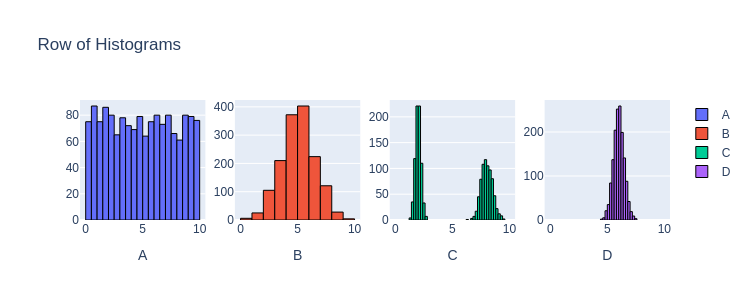

In [83]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**1. Which datasets have similar means and similar variances**

Dataset A and C

**2. Which datasets have similar means but quite different variances**

Dataset B and C

**3. Which datasets have similar variances but quite different means**

Dataset B and D

**4. Which datasets have quite different means and quite different variances**

Dataset C and D

***Question 5***

**Right-skewed distributions:**
* **Mean:** Since the tail on the right side is longer, there are likely to be larger values that pull the mean towards the right.
* **Median:** As the median is based on the middle value, it is less affected by the extreme values on the right.

**Left-skewed distributions:**
* **Mean:** The longer tail on the left side means there are likely to be smaller values that pull the mean towards the left.
* **Median:** Again, the median is less affected by the extreme values, so it remains closer to the center of the data.

**In summary:**
* **When the mean is greater than the median, the distribution is right-skewed.**
* **When the mean is less than the median, the distribution is left-skewed.**

Mean of sample1 (right-skewed): 4.091111487278782
Median of sample1 (right-skewed): 3.4544058795370023


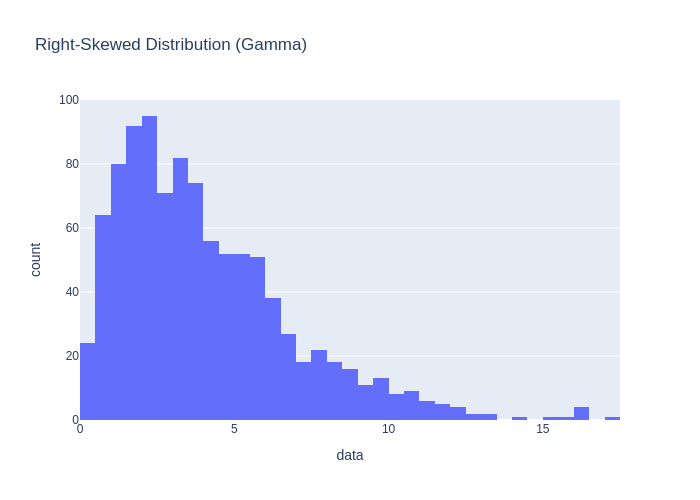

Mean of sample2 (left-skewed): -4.087156912661203
Median of sample2 (left-skewed): -3.5025195752996163


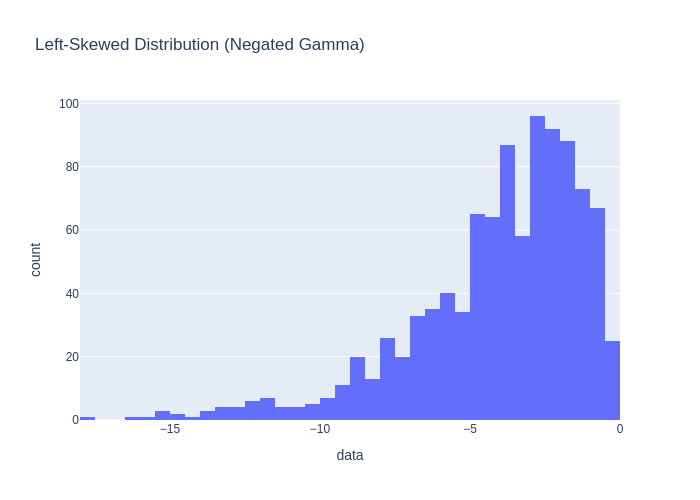

Right-Skewed Distribution: Mean = 4.091111487278782, Median = 3.4544058795370023
Left-Skewed Distribution: Mean = -4.087156912661203, Median = -3.5025195752996163


Text(0, 0.5, 'Values')

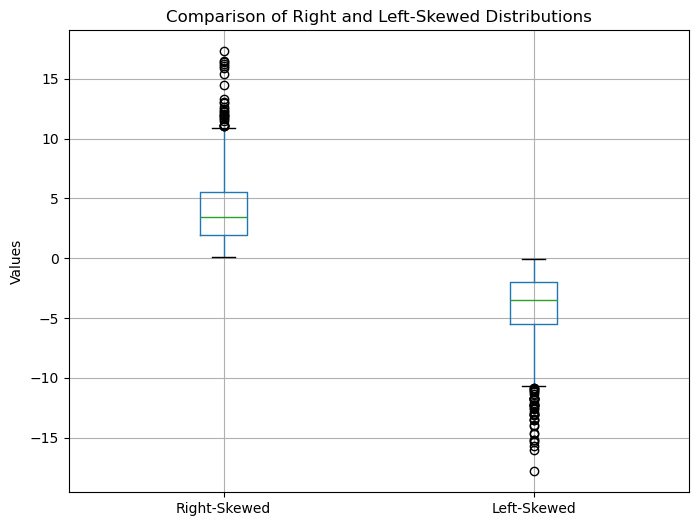

In [97]:
# Import necessary libraries
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# To show histograms using Plotly in a Jupyter Notebook
%matplotlib inline

# 1. Generate a right-skewed (positively skewed) sample using the Gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Calculate mean and median for the right-skewed sample
mean1 = sample1.mean()
median1 = np.quantile(sample1, 0.5)

# Display mean and median for the right-skewed sample
print(f"Mean of sample1 (right-skewed): {mean1}")
print(f"Median of sample1 (right-skewed): {median1}")

# Plot the histogram for the right-skewed sample
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Right-Skewed Distribution (Gamma)")
fig1.show(renderer="png")

# 2. Generate a left-skewed (negatively skewed) sample by negating the Gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Calculate mean and median for the left-skewed sample
mean2 = sample2.mean()
median2 = np.quantile(sample2, 0.5)

# Display mean and median for the left-skewed sample
print(f"Mean of sample2 (left-skewed): {mean2}")
print(f"Median of sample2 (left-skewed): {median2}")

# Plot the histogram for the left-skewed sample
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Left-Skewed Distribution (Negated Gamma)")
fig2.show(renderer="png")

# 3. Compare Means and Medians of Both Distributions
print(f"Right-Skewed Distribution: Mean = {mean1}, Median = {median1}")
print(f"Left-Skewed Distribution: Mean = {mean2}, Median = {median2}")

# Visualize the relationship in box plots for comparison
df_comparison = pd.DataFrame({
    'Right-Skewed': sample1,
    'Left-Skewed': sample2
})

# Box plot for comparing both distributions
plt.figure(figsize=(8,6))
df_comparison.boxplot(column=['Right-Skewed', 'Left-Skewed'])
plt.title("Comparison of Right and Left-Skewed Distributions")
plt.ylabel('Values')

### Summary of Exchanges

https://chatgpt.com/share/66f615c9-3dd0-8013-a2cb-d8193702791f

1. **Mean, Median, and Skewness Relationship**:
   - Discussed the relationship between the mean and median in right-skewed (positive skew) and left-skewed (negative skew) distributions.
   - Explained that in a right-skewed distribution, the mean is greater than the median, while in a left-skewed distribution, the mean is less than the median. This is due to the influence of outliers on the mean.

2. **Code Explanation**:
   - Analyzed a provided code snippet that generates random samples from a Gamma distribution, calculates the mean and median, and plots histograms for both right-skewed and left-skewed distributions.
   - Explained the significance of the Gamma distribution's characteristics and how negating the sample affects skewness.

3. **Notebook Code Sequence**:
   - Provided a sequence of code structured for a Jupyter Notebook to demonstrate the relationships between mean, median, and skewness through a series of cells.
   - Included data generation, statistical calculations, and visualizations using Plotly and Matplotlib.

4. **Complete Code Integration**:
   - Compiled the entire code sequence into one block for easy execution in a Jupyter Notebook, allowing for the generation and visualization of both right and left-skewed distributions, along with their statistical comparisons.

***Question 6***

In [86]:
import pandas as pd
import plotly.express as px

**Step 1: Load the Dataset**

In [87]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-23/english_education.csv'
df = pd.read_csv(url)

**Step 2: Inspect the Dataset**

In [88]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (1104, 31)
Columns: Index(['town11cd', 'town11nm', 'population_2011', 'size_flag', 'rgn11nm',
       'coastal', 'coastal_detailed', 'ttwa11cd', 'ttwa11nm',
       'ttwa_classification', 'job_density_flag', 'income_flag',
       'university_flag', 'level4qual_residents35_64_2011',
       'ks4_2012_2013_counts',
       'key_stage_2_attainment_school_year_2007_to_2008',
       'key_stage_4_attainment_school_year_2012_to_2013', 'level_2_at_age_18',
       'level_3_at_age_18', 'activity_at_age_19_full_time_higher_education',
       'activity_at_age_19_sustained_further_education',
       'activity_at_age_19_appprenticeships',
       'activity_at_age_19_employment_with_earnings_above_0',
       'activity_at_age_19_employment_with_earnings_above_10_000',
       'activity_at_age_19_out_of_work',
       'highest_level_qualification_achieved_by_age_22_less_than_level_1',
       'highest_level_qualification_achieved_by_age_22_level_1_to_level_2',
       'highest_level_qualification_achieve

In [89]:
# Check data types
print("Data Types:\n", df.dtypes)

Data Types:
 town11cd                                                              object
town11nm                                                              object
population_2011                                                      float64
size_flag                                                             object
rgn11nm                                                               object
coastal                                                               object
coastal_detailed                                                      object
ttwa11cd                                                              object
ttwa11nm                                                              object
ttwa_classification                                                   object
job_density_flag                                                      object
income_flag                                                           object
university_flag                                                

In [90]:
# Summary of missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 town11cd                                                               4
town11nm                                                               0
population_2011                                                        4
size_flag                                                              0
rgn11nm                                                                2
coastal                                                                4
coastal_detailed                                                       4
ttwa11cd                                                               4
ttwa11nm                                                               4
ttwa_classification                                                    4
job_density_flag                                                       4
income_flag                                                            4
university_flag                                                        4
level4qual_residents35_64_2011    

**Step 3: Visualizations**

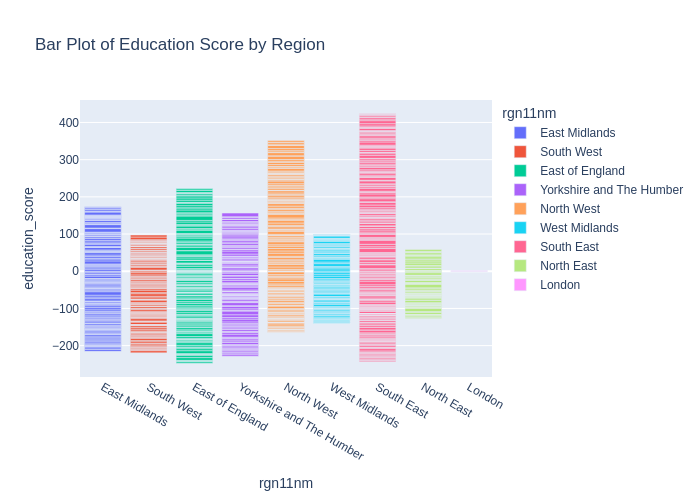

In [92]:
# Bar Plot - Example using 'rgn11nm' for categorical variable and 'education_score' for numerical variable
bar_plot = px.bar(df, x='rgn11nm', y='education_score', color='rgn11nm', title='Bar Plot of Education Score by Region')
bar_plot.show(renderer="png")

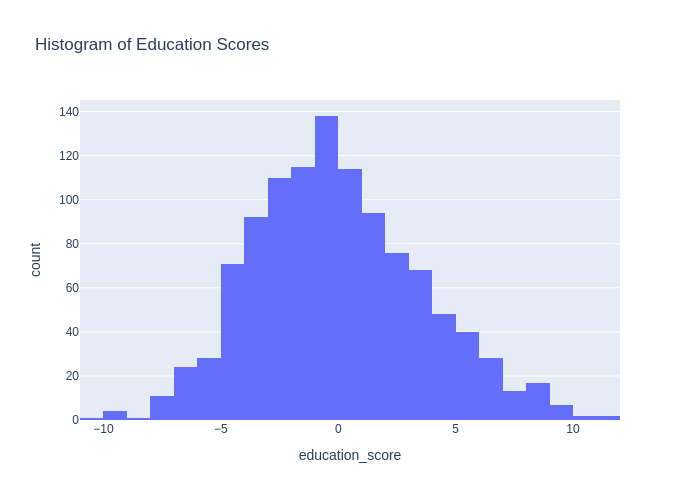

In [93]:
# Histogram - Example using 'education_score'
histogram = px.histogram(df, x='education_score', nbins=30, title='Histogram of Education Scores')
histogram.show(renderer="png")

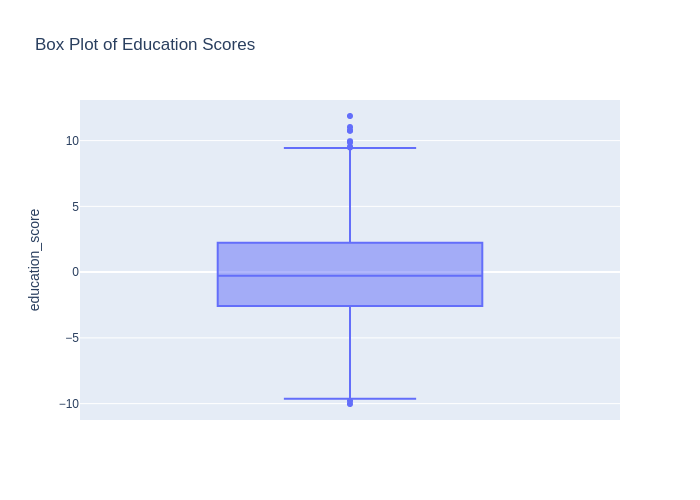

In [94]:
# Box Plot - Example using 'education_score'
box_plot = px.box(df, y='education_score', title='Box Plot of Education Scores')
box_plot.show(renderer="png")

**Analysis**

The dataset consists of 1104 rows and around 31 columns. Also, it includes numerical columns (e.g., education_score) and categorical columns (e.g., rgn11nm). Some columns contain missing values.

From the visualizations, the educational attainment of young people in English towns and cities can be found to be largely normally distributed, with the largest number of young people having educational scores clustered between -2 and 2, and the median hovering around 0. However, the educational attainment of young people in different areas shows a wide disparity.

***Question 7***

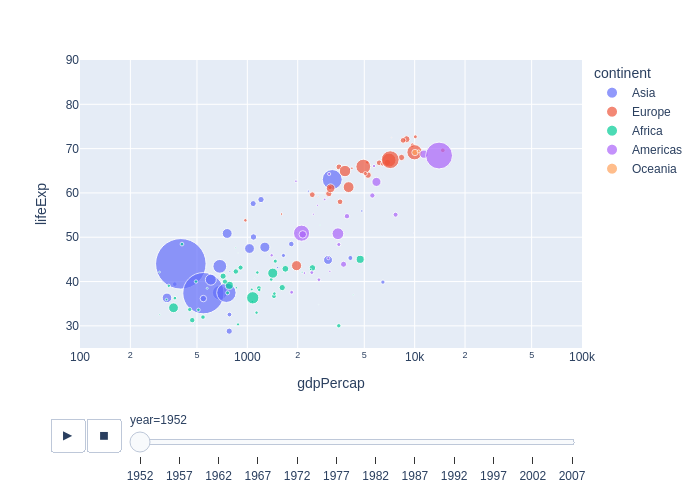

In [95]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer="png")

***Question 8***

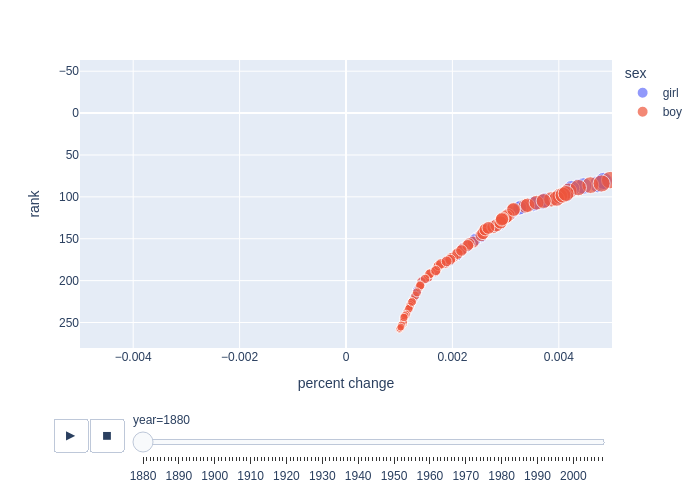

In [96]:
import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])

# Create the increaes or decrease in name prevalence from the last year  
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']


bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # Restrict to "common" names

fig = px.scatter(
    bn,
    x="percent change",
    y="rank",
    animation_frame="year",
    animation_group="name",
    size="percent",
    color="sex",
    hover_name="name",
    size_max=50,
    range_x=[-0.005, 0.005]  # range_y parameter is removed
)

fig.update_yaxes(autorange='reversed') # This lets us put rank 1 on the top

fig.show(renderer="png")  # Use renderer="png" for submissions

***Question 9***

Yes, I have.